<a href="https://colab.research.google.com/github/rawatpremsingh999/DeepWeedsX/blob/master/DeepWeedX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experiment on DeepWeedX dataset using MobileNetV3
url: https://www.kaggle.com/coreylammie/deepweedsx

The DeepWeedsX dataset consists of 17,508 unique 256x256 colour images in 9 classes. There are 15,007 training images and 2,501 test images. These images were collected in situ from eight rangeland environments across northern Australia.

All class label files consist of Comma Seperated Values (CSVs) detailing the label and species, for example: 20161207-111327-0.jpg, 0 denotes that 20161207-111327-0.jpg belongs to class 0 (Chinee Apple).

Class and species labels are as follows:

0- Chinee Apple <br>
1- Lantana <br>
2- Parkinsonia <br>
3- Parthenium <br>
4- Prickly Acacia <br>
5- Rubber Vine <br>
6- Siam Weed <br>
7- Snake Weed <br>
8- Other. <br>

All images are compressed in a single ZIP archive, and are labelled as per the class file labels.

**Download data from kaggle**

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

In [ ]:
#changing the working directory
%cd /content/

#Check the present working directory using pwd command
!pwd

/content
/content


Note: <br>
(1) First, download json file from your kaggle profile. <br> 
**( Your Profile > Edit Profile > API section > Create New API Token)**. <br> 
It downloads a json file.

(2) upload json file in the collab directory *i.e. /content/*

In [ ]:
!kaggle datasets download -d coreylammie/deepweedsx

 98% 929M/943M [00:36<00:00, 20.8MB/s]
100% 943M/943M [00:36<00:00, 27.0MB/s]


In [ ]:
# extract zip file
import zipfile

local_zip = '/content/deepweedsx.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/deepweedsx')
zip_ref.close()

**Import Necessary Libraries**

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
training_path = '/content/deepweedsx/train_set_labels.csv'
train_df = pd.read_csv(training_path)

testing_path = '/content/deepweedsx/test_set_labels.csv'
test_df = pd.read_csv(testing_path)

In [ ]:
train_df.shape, test_df.shape

((15007, 2), (2501, 2))

In [ ]:
validation_df = train_df.sample(frac = 0.1)
train_df = train_df.drop(validation_df.index)
train_df.shape, validation_df.shape

((13506, 2), (1501, 2))

In [ ]:
# Directory with our image dataset
all_image_dir = os.path.join('/content/deepweedsx/DeepWeeds_Images_256')

In [ ]:
image_names = os.listdir(all_image_dir)
print(image_names[:10])

['20171218-121357-3.jpg', '20180125-095419-2.jpg', '20180112-092725-2.jpg', '20170920-174414-1.jpg', '20170207-153756-0.jpg', '20180112-071922-2.jpg', '20180125-095811-1.jpg', '20170217-121035-0.jpg', '20161207-111555-0.jpg', '20180109-073013-2.jpg']


In [ ]:
print('Total images:', len(os.listdir(all_image_dir)))

Total images: 17536


## Visualize images

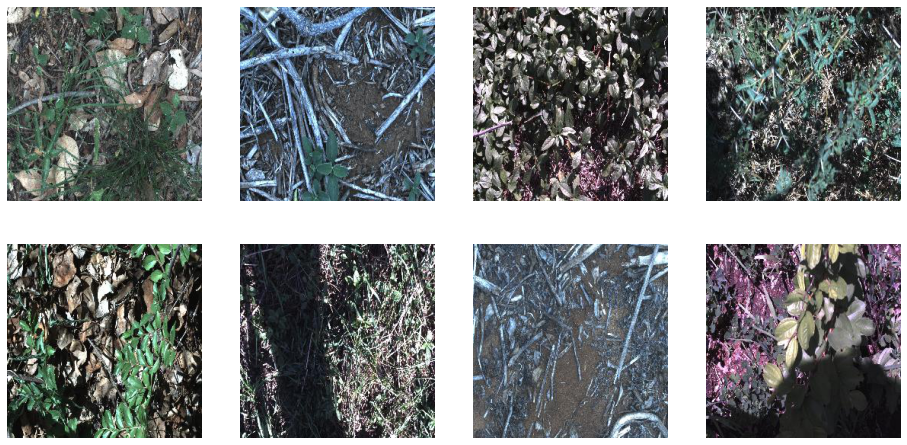

In [ ]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 2
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_image_pix = [os.path.join(all_image_dir, fname) 
                for fname in image_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_image_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Generate Data using ImageGenerator

In [ ]:
train_df.head()

,Label,Species
1,20170718-095159-2.jpg,0
3,20170811-133752-1.jpg,0
4,20170217-114015-0.jpg,0
5,20170811-123145-2.jpg,0
6,20170811-131023-1.jpg,0


In [ ]:
# for training dataframe
species_name = ['Chinee Apple','Lantana','Parkinsonia','Parthenium','Prickly Acacia',
                'Rubber Vine','Siam Weed','Snake Weed','Other']

categories = []
for sp in train_df['Species']:
  categories.append(species_name[sp])
train_df['Categories'] = categories

# for validation dataframe
categories = []
for sp in validation_df['Species']:
  categories.append(species_name[sp])
validation_df['Categories'] = categories

# for Test dataframe
categories = []
for sp in test_df['Species']:
  categories.append(species_name[sp])
test_df['Categories'] = categories

In [ ]:
train_df.head()

,Label,Species,Categories
1,20170718-095159-2.jpg,0,Chinee Apple
3,20170811-133752-1.jpg,0,Chinee Apple
4,20170217-114015-0.jpg,0,Chinee Apple
5,20170811-123145-2.jpg,0,Chinee Apple
6,20170811-131023-1.jpg,0,Chinee Apple


In [ ]:
# Images rescaled by 1/255
image_path = "/content/deepweedsx/DeepWeeds_Images_256"

train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
                                                    directory = image_path,
                                                    x_col = "Label",
                                                    y_col = "Categories",
                                                    target_size = (224,224),
                                                    batch_size = 64,
                                                    class_mode = "categorical",
                                                    color_mode = "rgb"
                                                    )


validation_datagen = ImageDataGenerator()
validation_generator = validation_datagen.flow_from_dataframe(dataframe=validation_df,
                                                              directory=image_path,
                                                              x_col = "Label",
                                                              y_col = "Categories",
                                                              target_size = (224,224),
                                                              batch_size = 64,
                                                              class_mode = "categorical",
                                                              color_mode = "rgb"
                                                              )


test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  directory=image_path,
                                                  x_col = "Label",
                                                  y_col = "Categories",
                                                  target_size = (224,224),
                                                  batch_size = 64,
                                                  class_mode = "categorical",
                                                  color_mode = "rgb"
                                                  )

Found 13506 validated image filenames belonging to 9 classes.
Found 1501 validated image filenames belonging to 9 classes.
Found 2501 validated image filenames belonging to 9 classes.


**Data Augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

## Building a sample CNN model

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 128*128 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The Third layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flat
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 9 output neuron. It will contain a value from 0-8
    tf.keras.layers.Dense(9, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 256)     7168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 256)     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 128)     295040    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 43264)            

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

**Train the model**

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=16,
      batch_size = 16,
      epochs=20,
      verbose=1,
      validation_data=validation_generator,
      validation_steps=8)

Epoch 1/20
16/16 [==============================] - 8s 482ms/step - loss: 31952.0525 - accuracy: 0.3400 - val_loss: 1.6576 - val_accuracy: 0.5625
Epoch 2/20
16/16 [==============================] - 8s 472ms/step - loss: 1.7879 - accuracy: 0.4933 - val_loss: 1.6725 - val_accuracy: 0.5566
Epoch 3/20
16/16 [==============================] - 8s 470ms/step - loss: 1.7225 - accuracy: 0.5133 - val_loss: 1.6342 - val_accuracy: 0.5352
Epoch 4/20
16/16 [==============================] - 8s 474ms/step - loss: 1.7265 - accuracy: 0.5019 - val_loss: 1.7878 - val_accuracy: 0.5430
Epoch 5/20
16/16 [==============================] - 8s 475ms/step - loss: 1.7657 - accuracy: 0.5189 - val_loss: 1.7170 - val_accuracy: 0.5293
Epoch 6/20
16/16 [==============================] - 8s 470ms/step - loss: 1.7589 - accuracy: 0.5160 - val_loss: 1.9718 - val_accuracy: 0.5371
Epoch 7/20
16/16 [==============================] - 7s 468ms/step - loss: 76.8332 - accuracy: 0.4766 - val_loss: 2.0453 - val_accuracy: 0.5488
E

In [ ]:
model.evaluate(test_generator)

40/40 [==============================] - 7s 161ms/step - loss: 1.1849 - accuracy: 0.5750


[1.184880018234253, 0.574970006942749]

## Mobile Net V3 Large

In [ ]:
base_model = MobileNetV3Large(input_shape=(224,224,3),
                              weights = None,
                              classes=9)

In [ ]:
base_model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_9 (Rescaling)         (None, 224, 224, 3)  0           input_20[0][0]                   
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_9[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v3.preprocess_input(x)
outputs = base_model(x)
mobilenetv3 = tf.keras.Model(inputs,outputs)

In [ ]:
mobilenetv3.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
MobilenetV3large (Functional (None, 9)                 4237961   
Total params: 4,237,961
Trainable params: 4,213,561
Non-trainable params: 24,400
_________________________________________________________________


In [ ]:
mobilenetv3.compile(loss =tf.keras.losses.KLDivergence(),optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [ ]:
history = mobilenetv3.fit(train_generator,
                steps_per_epoch =4,
                 epochs=10,
                 batch_size=16,
                 verbose=1,
                 validation_data = validation_generator,
                 validation_steps= 4)

Epoch 1/10
4/4 [==============================] - 12s 966ms/step - loss: 2.6712 - accuracy: 0.1839 - val_loss: 2.1264 - val_accuracy: 0.5859
Epoch 2/10
4/4 [==============================] - 2s 598ms/step - loss: 2.2188 - accuracy: 0.5297 - val_loss: 2.1180 - val_accuracy: 0.5352
Epoch 3/10
4/4 [==============================] - 2s 607ms/step - loss: 2.1053 - accuracy: 0.4318 - val_loss: 2.1362 - val_accuracy: 0.5273
Epoch 4/10
4/4 [==============================] - 2s 597ms/step - loss: 2.1044 - accuracy: 0.4724 - val_loss: 2.0863 - val_accuracy: 0.5156
Epoch 5/10
4/4 [==============================] - 2s 608ms/step - loss: 1.7567 - accuracy: 0.5083 - val_loss: 2.0546 - val_accuracy: 0.5820
Epoch 6/10
4/4 [==============================] - 2s 600ms/step - loss: 1.8620 - accuracy: 0.4453 - val_loss: 2.0540 - val_accuracy: 0.5430
Epoch 7/10
4/4 [==============================] - 2s 615ms/step - loss: 1.8337 - accuracy: 0.5120 - val_loss: 2.0068 - val_accuracy: 0.5547
Epoch 8/10
4/4 [===

In [ ]:
mobilenetv3.evaluate(test_generator)

40/40 [==============================] - 6s 143ms/step - loss: 1.8231 - accuracy: 0.5202


[1.823114275932312, 0.5201919078826904]

**Learning Curve**

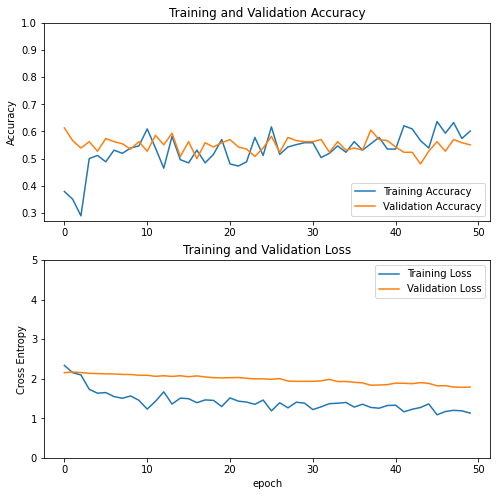

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#### Without top layer

In [ ]:
base_mobilenetv3 = MobileNetV3Large(input_shape=(224,224,3),
                                    weights = 'imagenet',
                                    include_top = False)

In [ ]:
base_mobilenetv3.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_11 (Rescaling)        (None, 224, 224, 3)  0           input_26[0][0]                   
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_11[0][0]               
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

In [ ]:
base_mobilenetv3.trainable = False

In [ ]:
base_mobilenetv3.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_11 (Rescaling)        (None, 224, 224, 3)  0           input_26[0][0]                   
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_11[0][0]               
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v3.preprocess_input(x)
x = base_mobilenetv3(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(9,activation='softmax')(x)
mobile_model = tf.keras.Model(inputs, outputs)

In [ ]:
mobile_model.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
MobilenetV3large (Functional (None, 7, 7, 1280)        4226432   
_________________________________________________________________
flatten_18 (Flatten)         (None, 62720)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 9)                 564489    
Total params: 4,790,921
Trainable params: 2,566,009
Non-trainable params: 2,224,912
_________________________________________________________________


In [ ]:
mobile_model.compile(loss = tf.keras.losses.KLDivergence(), optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
history = mobile_model.fit(train_generator,
                 steps_per_epoch =8,
                 epochs=20,
                 batch_size=16,
                 verbose=1,
                 validation_data = validation_generator,
                 validation_steps= 4)

Epoch 1/20
8/8 [==============================] - 6s 400ms/step - loss: 3.5652 - accuracy: 0.3650 - val_loss: 1.9812 - val_accuracy: 0.5117
Epoch 2/20
8/8 [==============================] - 2s 261ms/step - loss: 2.3103 - accuracy: 0.4392 - val_loss: 2.0505 - val_accuracy: 0.3867
Epoch 3/20
8/8 [==============================] - 2s 260ms/step - loss: 1.6876 - accuracy: 0.4941 - val_loss: 1.6135 - val_accuracy: 0.5391
Epoch 4/20
8/8 [==============================] - 2s 260ms/step - loss: 1.6577 - accuracy: 0.5397 - val_loss: 1.7376 - val_accuracy: 0.6133
Epoch 5/20
8/8 [==============================] - 2s 259ms/step - loss: 1.8499 - accuracy: 0.5385 - val_loss: 1.7467 - val_accuracy: 0.4961
Epoch 6/20
8/8 [==============================] - 2s 262ms/step - loss: 1.1905 - accuracy: 0.6600 - val_loss: 1.8947 - val_accuracy: 0.5312
Epoch 7/20
8/8 [==============================] - 2s 262ms/step - loss: 1.3647 - accuracy: 0.6164 - val_loss: 1.5061 - val_accuracy: 0.5938
Epoch 8/20
8/8 [====

In [ ]:
mobile_model.evaluate(test_generator)

40/40 [==============================] - 6s 141ms/step - loss: 1.8764 - accuracy: 0.5262


[1.8764398097991943, 0.5261895060539246]

**Un-freeze the top layers of the mobile net model**

In [ ]:
base_mobilenetv3.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_mobilenetv3.layers))

Number of layers in the base model:  276


In [ ]:
# Fine-tune from this layer onwards
fine_tune_at = 250

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_mobilenetv3.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
mobile_model.compile(loss=tf.keras.losses.KLDivergence(),
              optimizer = Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
mobile_model.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
MobilenetV3large (Functional (None, 7, 7, 1280)        4226432   
_________________________________________________________________
flatten_18 (Flatten)         (None, 62720)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 9)                 564489    
Total params: 4,790,921
Trainable params: 2,566,009
Non-trainable params: 2,224,912
_________________________________________________________________


In [ ]:
hist = mobile_model.fit(train_generator,
                 steps_per_epoch = 4,
                 epochs=50,
                 batch_size=16,
                 verbose=1,
                 validation_data = validation_generator,
                 validation_steps= 4)

Epoch 1/50
4/4 [==============================] - 6s 730ms/step - loss: 2.1536 - accuracy: 0.2547 - val_loss: 1.5937 - val_accuracy: 0.4570
Epoch 2/50
4/4 [==============================] - 1s 407ms/step - loss: 1.5730 - accuracy: 0.4969 - val_loss: 1.2884 - val_accuracy: 0.5820
Epoch 3/50
4/4 [==============================] - 1s 409ms/step - loss: 1.0652 - accuracy: 0.6661 - val_loss: 1.3699 - val_accuracy: 0.5547
Epoch 4/50
4/4 [==============================] - 1s 408ms/step - loss: 1.1480 - accuracy: 0.6047 - val_loss: 1.1899 - val_accuracy: 0.5977
Epoch 5/50
4/4 [==============================] - 1s 406ms/step - loss: 0.9470 - accuracy: 0.6932 - val_loss: 0.9772 - val_accuracy: 0.6875
Epoch 6/50
4/4 [==============================] - 1s 404ms/step - loss: 0.9796 - accuracy: 0.7036 - val_loss: 0.9037 - val_accuracy: 0.7266
Epoch 7/50
4/4 [==============================] - 1s 410ms/step - loss: 0.8644 - accuracy: 0.7266 - val_loss: 0.9422 - val_accuracy: 0.6836
Epoch 8/50
4/4 [====

In [ ]:
mobile_model.evaluate(test_generator)

40/40 [==============================] - 6s 142ms/step - loss: 0.7158 - accuracy: 0.7641


[0.7157939076423645, 0.764094352722168]

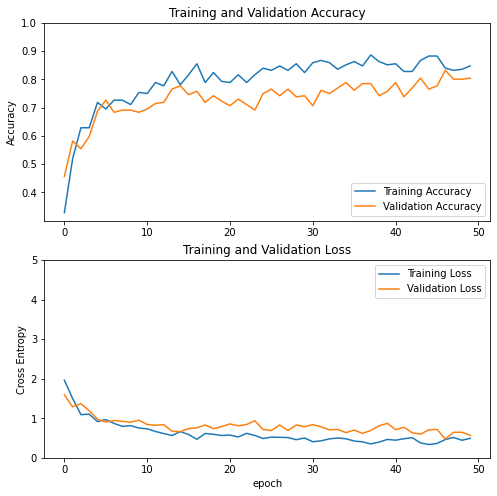

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()